In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [27]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Data Exploration and Viswalization

In [29]:
left=df[df.left==1]
left.shape


(3571, 10)

In [30]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [31]:
df['left'] = df['left'].astype(int)


In [43]:
df.groupby('left').mean(numeric_only=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Impact of Salary on Employee retention

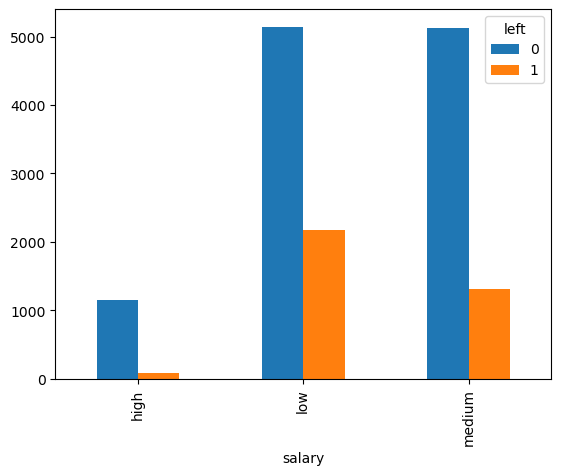

In [47]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.show()

In [ ]:
#Above bar chart shows employees with high salaries are likely to not leave the company

# Department wise employee retention rate

In [48]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

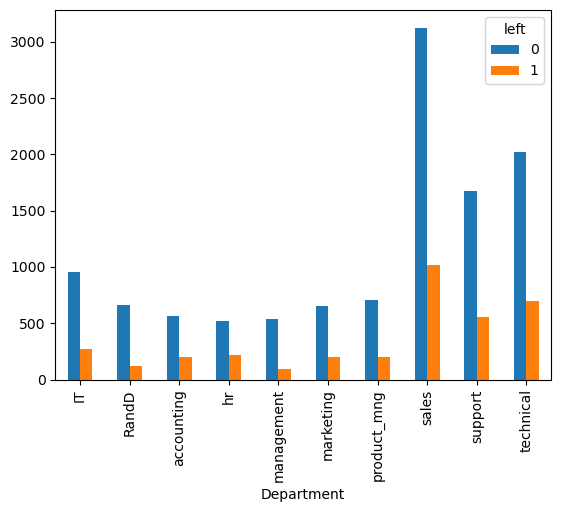

In [49]:
plt.show()

In [51]:
#From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

# From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**
**Average Monthly Hours**
**Promotion Last 5 Years**
**Salary**

In [52]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [53]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [54]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [55]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [56]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [57]:
X = df_with_dummies
X.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [59]:
y = df.left

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [62]:
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

# Accuracy Of Model

In [64]:
model.score(X_test,y_test)

0.7798095238095238